In [1]:
import as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import folium
warnings.filterwarnings('ignore')

In [2]:
sns.set(font_scale=1.5)
sns.set_style(style="darkgrid")

In [3]:
custo = pd.read_csv('olist_customers_dataset.csv')

In [4]:
custo.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
custo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


## 1 Show the number of customers are form same state ?

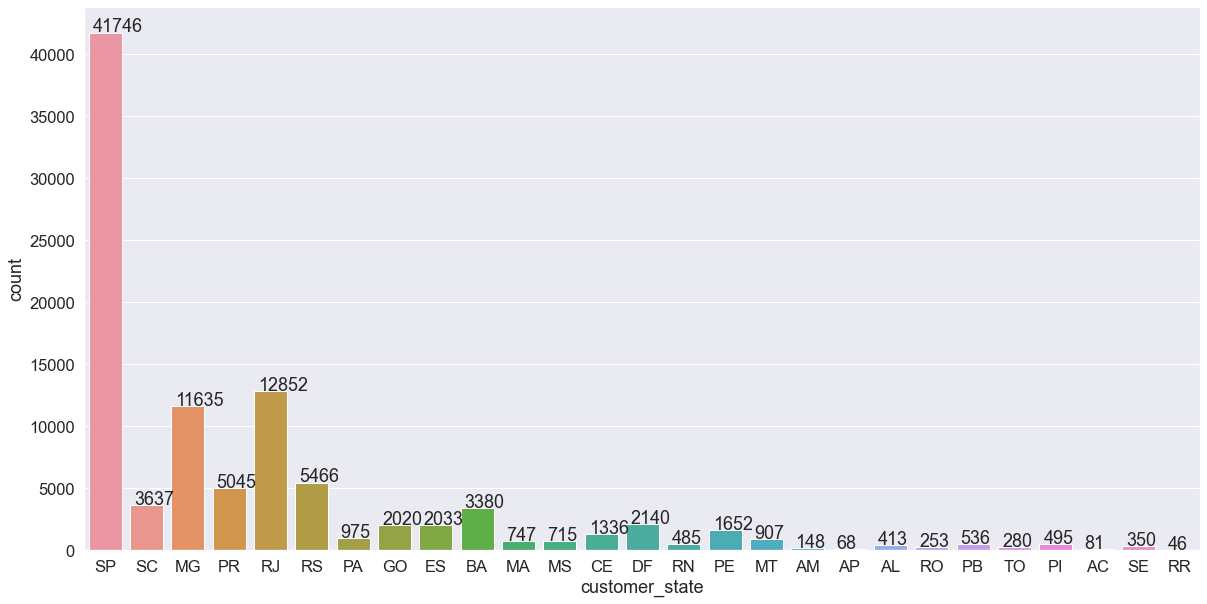

In [6]:
plt.figure(figsize=(20,10))
plot = sns.countplot(x='customer_state',data=custo)
plt.ylabel('No of customers)
for p in plot.patches:
        plot.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

In [7]:
items = pd.read_csv('olist_order_items_dataset.csv')

In [8]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


# 2 Show the distribution of price and freight value columns ?

Text(0.5, 1.0, 'Distribution of Price Column')

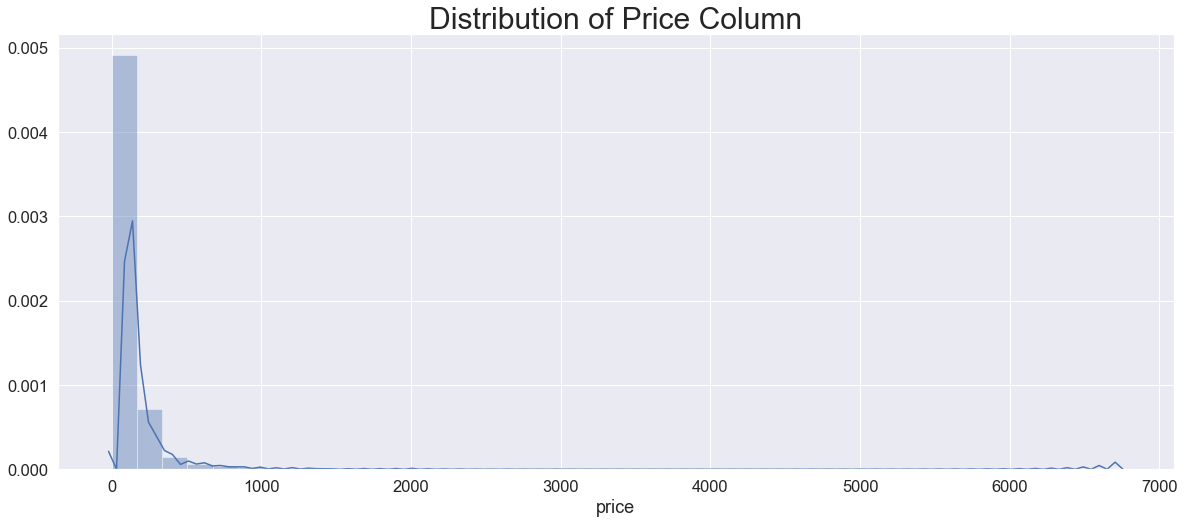

In [10]:
plt.figure(figsize=(20,8))
sns.distplot(items.price,hist = True, bins = 40)
plt.title('Distribution of Price Column',fontsize=30)

<AxesSubplot:title={'center':'Distribution of freight_value Column'}, xlabel='freight_value'>

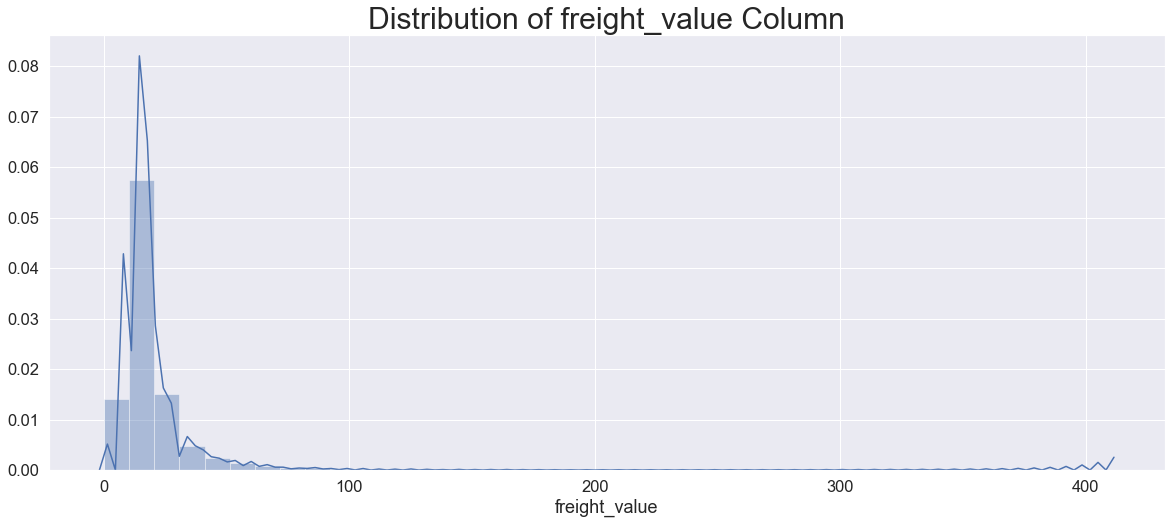

In [11]:
plt.figure(figsize=(20,8))
plt.title('Distribution of freight_value Column',fontsize=30)
sns.distplot(items.freight_value,hist = True, bins = 40)

## 3 Get the order Id's with highest price paid ?

In [12]:
highest_price = items.price.max()

In [13]:
print('-'*100)
print('the order id with highest price paid is ',items[items.price == highest_price].order_id.iloc[0],highest_price)
print('\n'*4)
print('-'*100)

----------------------------------------------------------------------------------------------------
the order id with highest price paid is  0812eb902a67711a1cb742b3cdaa65ae 6735.0





----------------------------------------------------------------------------------------------------


In [14]:
payments = pd.read_csv('olist_order_payments_dataset.csv')

In [15]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


## 4 Show how many installments it took for the orders ?

Text(0.5, 1.0, "comparision between installments and order id's")

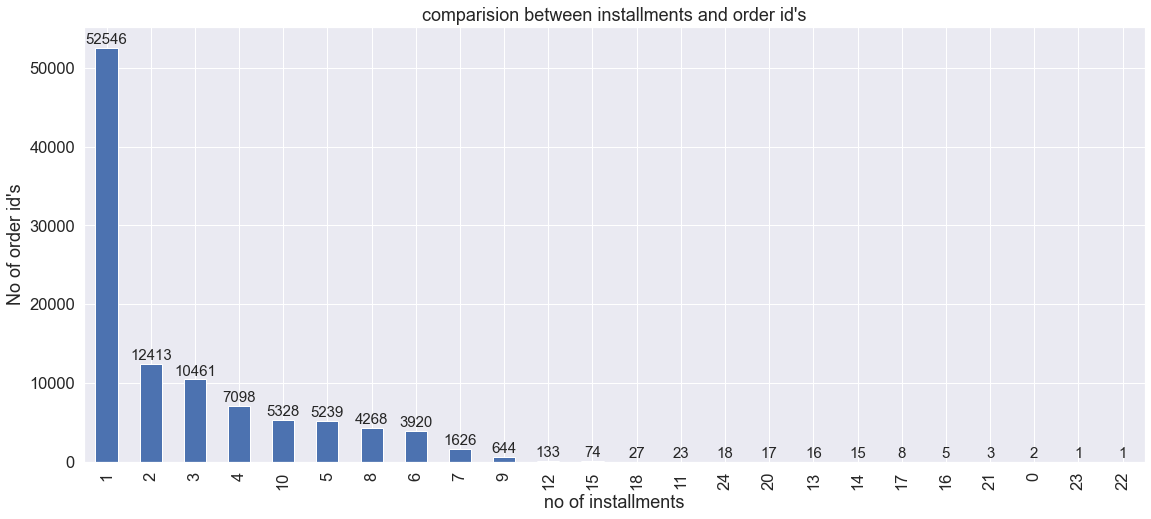

In [17]:
plots = payments.payment_installments.value_counts().plot(kind = 'bar',figsize=(19,8))
for bar in plots.patches:
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('no of installments')
plt.ylabel('No of order id\'s')
plt.title('comparision between installments and order id\'s')

## 5 show how many payment methods have been used and show an illustration of which one is used the most?

In [18]:
print('In total :',len(set(payments.payment_type)),',payment methods are used')

In total : 5 ,payment methods are used


In [19]:
payment_type_total = payments.payment_type.value_counts().to_frame().reset_index()
payment_type_total

,index,payment_type
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


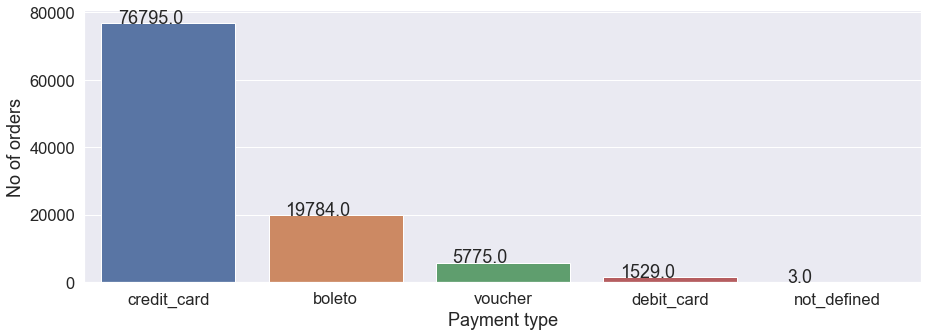

In [20]:
plt.figure(figsize=(15,5))
plot = sns.barplot(x='index',y='payment_type',data=payment_type_total)
plt.xlabel('Payment type')
plt.ylabel('No of orders')
for p in plot.patches:
        plot.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

## 6 Perform categorical encoding on the column payment_type ?

In [21]:
payments = pd.get_dummies(payments,columns=['payment_type'],drop_first=True)

In [22]:
payments.head()

,order_id,payment_sequential,payment_installments,payment_value,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,1,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,24.39,1,0,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,65.71,1,0,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,8,107.78,1,0,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,2,128.45,1,0,0,0


In [23]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [24]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [25]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


## 7 calculate the percentage of each value of review score and visualise them in a pie chart ?

In [26]:
percentage_values = reviews.review_score.value_counts()/len(reviews)*100

In [27]:
percentage_values

5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: review_score, dtype: float64

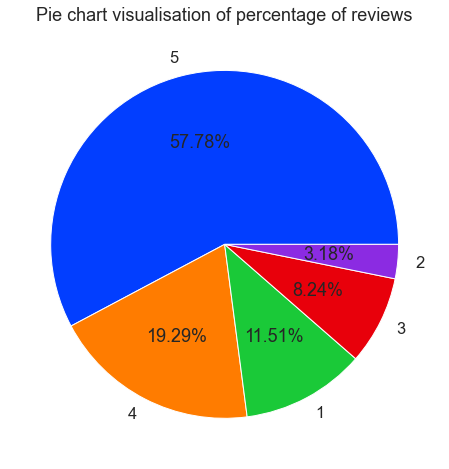

In [28]:
# increase font size
plt.figure(figsize=(8,8))
colors = sns.color_palette('bright')
plt.pie(percentage_values,labels=percentage_values.index,colors = colors, autopct = '%0.2f%%')
plt.title('Pie chart visualisation of percentage of reviews')
plt.show()

In [29]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [30]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


## 8 Find out what is the status of the most of the orders ?

In [32]:
order_status = orders.order_status.value_counts()

In [1]:
print('-'*100)
print(f'The status of most of the orders is {order_status.idx()}')
print('\n'*4)
print('-'*100)

----------------------------------------------------------------------------------------------------


NameError: name 'order_status' is not defined

## 9 Calculate the time taken for the orders to deliver and show the comparision between delayed and on time orders ?

In [34]:
order_delivered = orders[orders.order_status == 'delivered']
order_delivered['order_approved_at'] = pd.to_datetime(order_delivered['order_approved_at'], format = '%Y-%m-%d').dt.normalize()
order_delivered['order_delivered_customer_date'] = pd.to_datetime(order_delivered['order_delivered_customer_date'], format = '%Y-%m-%d').dt.normalize()
order_delivered['order_estimated_delivery_date'] = pd.to_datetime(order_delivered['order_estimated_delivery_date'], format = '%Y-%m-%d').dt.normalize()
order_delivered['delivery_time'] = order_delivered.order_delivered_customer_date - order_delivered.order_approved_at
order_delivered['estimated_delivery_time'] = order_delivered.order_estimated_delivery_date - order_delivered.order_approved_at
order_delivered['status'] = order_delivered.delivery_time > order_delivered.estimated_delivery_time
order_delivered.replace({'status': {True: 'delayed', False: 'on time'}},inplace=True)

In [35]:
order_delivered[['delivery_time','estimated_delivery_time','status']].head()

,delivery_time,estimated_delivery_time,status
0,8 days,16 days,on time
1,12 days,18 days,on time
2,9 days,27 days,on time
3,14 days,27 days,on time
4,3 days,13 days,on time


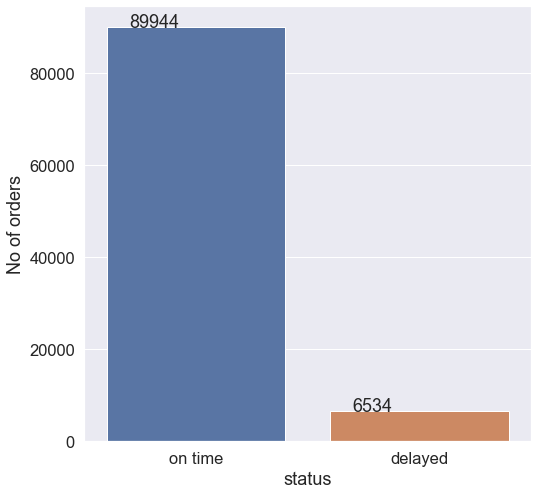

In [36]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='status',data=order_delivered)
plt.ylabel('No of orders')
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))

In [37]:
products = pd.read_csv('olist_products_dataset.csv')

In [38]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## 10 How many categories of products are available ?

In [41]:
print('-'*100)
print(f'Total categories of products that are vailable are: {len(products.product_category_name.unique())} categories')
print('\n'*4)
print('-'*100)

----------------------------------------------------------------------------------------------------
Total categories of products that are vailable are: 74 categories





----------------------------------------------------------------------------------------------------


## 11 Find out what is the Average surface area of the products ?

In [42]:
products['surface_area'] = 2*(products.product_length_cm*products.product_height_cm + products.product_height_cm*products.product_width_cm
                             + products.product_length_cm*products.product_width_cm)

In [43]:
print('-'*100)
print(f'The average surface area of the products is: {np.round(products.surface_area.mean(),2)} sq.cm')
print('\n'*4)
print('-'*100)

----------------------------------------------------------------------------------------------------
The average surface area of the products is: 3678.72 sq.cm





----------------------------------------------------------------------------------------------------


In [44]:
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [45]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [46]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


## 12 get the data of number of sellers from same state and showcase visually ?

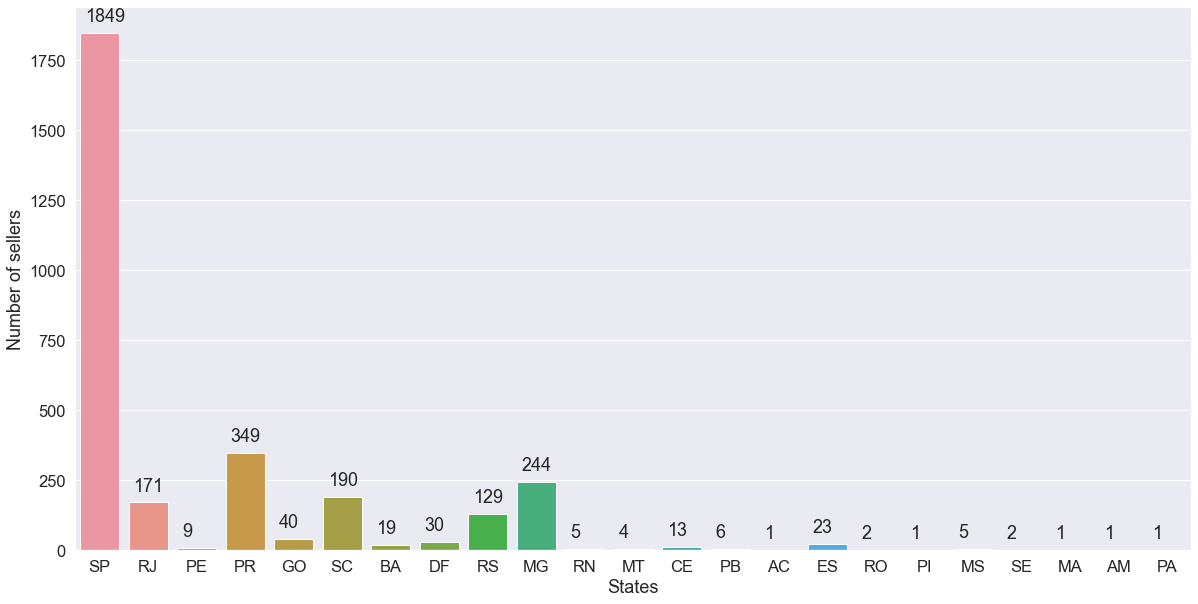

In [47]:
plt.figure(figsize=(20,10))
plot = sns.countplot(x='seller_state',data=sellers)
plt.ylabel('Number of sellers')
plt.xlabel('States')
for p in plot.patches:
        plot.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+40))

In [48]:
country_locations = pd.read_csv('olist_geolocation_dataset.csv')

In [49]:
country_locations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [50]:
country_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


## 13 Select any of the states in the geolocation_state and show the co ordinated in a MAP?

In [51]:
country_locations.geolocation_state.value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

In [52]:
state_rr = country_locations[country_locations.geolocation_state == 'RR']

In [53]:
state_rr

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
777226,69313,2.817595,-60.728699,boa vista,RR
777227,69306,2.833882,-60.669115,boa vista,RR
777228,69310,2.836008,-60.711580,boa vista,RR
777229,69314,2.815559,-60.737210,boa vista,RR
777230,69301,2.814077,-60.669130,boa vista,RR
...,...,...,...,...,...
777867,69316,2.765127,-60.735404,boa vista,RR
777868,69378,0.880792,-59.696035,caroebe,RR
777869,69309,2.809871,-60.702822,boa vista,RR
777870,69373,0.935138,-60.427393,rorainopolis,RR


In [54]:
lati = list(state_rr.geolocation_lat)
long = list(state_rr.geolocation_lng)

In [55]:
my_map = folium.Map(location = [2.7381528,-60.7155532],zoom_start = 11)
for i in range(len(lati)):
    folium.Marker([lati[i],long[i]]).add_to(my_map)

In [56]:
my_map

In [57]:
name_translation = pd.read_csv('product_category_name_translation.csv')

In [58]:
name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [59]:
name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## 14 Plot a word cloud of the translated product categories ?

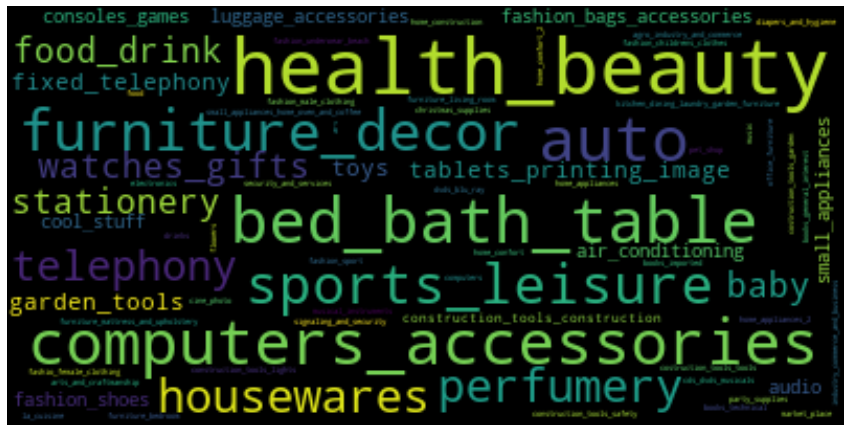

In [60]:
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
words = " ".join([twts for twts in name_translation.product_category_name_english])
wordcloud = WordCloud().generate(words)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 15 build a simple model to predict the payment value from the payments dataset ?

In [61]:
payments.isnull().sum()

order_id                    0
payment_sequential          0
payment_installments        0
payment_value               0
payment_type_credit_card    0
payment_type_debit_card     0
payment_type_not_defined    0
payment_type_voucher        0
dtype: int64

In [62]:
payments

,order_id,payment_sequential,payment_installments,payment_value,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,1,0,0,0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,24.39,1,0,0,0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,65.71,1,0,0,0
3,ba78997921bbcdc1373bb41e913ab953,1,8,107.78,1,0,0,0
4,42fdf880ba16b47b59251dd489d4441a,1,2,128.45,1,0,0,0
...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,1,363.31,0,0,0,0
103882,7b905861d7c825891d6347454ea7863f,1,2,96.80,1,0,0,0
103883,32609bbb3dd69b3c066a6860554a77bf,1,1,47.77,1,0,0,0
103884,b8b61059626efa996a60be9bb9320e10,1,5,369.54,1,0,0,0


In [63]:
payments.drop(columns=['order_id'],inplace=True)

In [64]:
payments

,payment_sequential,payment_installments,payment_value,payment_type_credit_card,payment_type_debit_card,payment_type_not_defined,payment_type_voucher
0,1,8,99.33,1,0,0,0
1,1,1,24.39,1,0,0,0
2,1,1,65.71,1,0,0,0
3,1,8,107.78,1,0,0,0
4,1,2,128.45,1,0,0,0
...,...,...,...,...,...,...,...
103881,1,1,363.31,0,0,0,0
103882,1,2,96.80,1,0,0,0
103883,1,1,47.77,1,0,0,0
103884,1,5,369.54,1,0,0,0


In [65]:
columns = list(payments.columns)

In [66]:
columns.remove('payment_value')

In [67]:
X = payments[columns]
Y = payments['payment_value']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
model = RandomForestRegressor(n_estimators=20)

In [71]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20)

In [72]:
y_pred = model.predict(x_test)

In [73]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 98.5204368958981
Mean Squared Error: 41957.05174651759
Root Mean Squared Error: 204.834205509035
